In [1]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

# Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 1. Data Loading, Examinating and Cleaning

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df = df.dropna(subset=['CustomerID'])

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df.duplicated().sum()

5225

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df.shape

(401604, 8)

In [15]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.describe() 

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [16]:
df.shape

(392692, 8)

In [17]:
# if the date format comes in datetime, we can also extract the day/month/year using the to_period function
# where 'D', 'M', 'Y' are inputs
df['InvoiceMonth'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [18]:
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [19]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,2011-08
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,2011-08
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12,2011-08


### 2. Creating the Cohort Anlysis

In [20]:
# Get the invoice year and invoice month

def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [21]:
invoice_year, invoice_month = get_date(df, 'InvoiceMonth')

In [22]:
# check the invoice_year and invoice_month variables
invoice_year[:10] # check the first 10 rows of data

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: InvoiceMonth, dtype: int64

In [23]:
invoice_month[:10] # check the first 10 rows of data

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: InvoiceMonth, dtype: int64

In [24]:
# Get the cohort year and cohort month
cohort_year, cohort_month = get_date(df, 'CohortMonth')

In [25]:
# check the cohort_year and cohort_month variables
cohort_year[:10] # check the first 10 rows of data

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: CohortMonth, dtype: int64

In [26]:
cohort_month[:10] # check the first 10 rows of data

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: CohortMonth, dtype: int64

In [27]:
# create a variable that holds the difference between the invoice and cohort year
year_diff = invoice_year - cohort_year
year_diff

0         0
1         0
2         0
3         0
4         0
         ..
541904    0
541905    0
541906    0
541907    0
541908    0
Length: 392692, dtype: int64

In [28]:
# create a variable that holds the difference between the invoice and cohort month
month_diff = invoice_month - cohort_month
month_diff

0         0
1         0
2         0
3         0
4         0
         ..
541904    4
541905    4
541906    4
541907    4
541908    4
Length: 392692, dtype: int64

In [29]:
# create cohort index
df['CohortIndex'] = year_diff * 12 + month_diff + 1

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1


In [31]:
#Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data

CohortMonth  CohortIndex
2010-12      1              885
             2              324
             3              286
             4              340
             5              321
                           ... 
2011-10      2               86
             3               41
2011-11      1              323
             2               36
2011-12      1               41
Name: CustomerID, Length: 91, dtype: int64

In [32]:
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Retention Rate Table

In [33]:
# Retention table
cohort_size = cohort_counts.iloc[:,0] # extract the first column

In [34]:
cohort_size

CohortMonth
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
2011-05    284.0
2011-06    242.0
2011-07    188.0
2011-08    169.0
2011-09    299.0
2011-10    358.0
2011-11    323.0
2011-12     41.0
Freq: M, Name: 1, dtype: float64

In [35]:
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


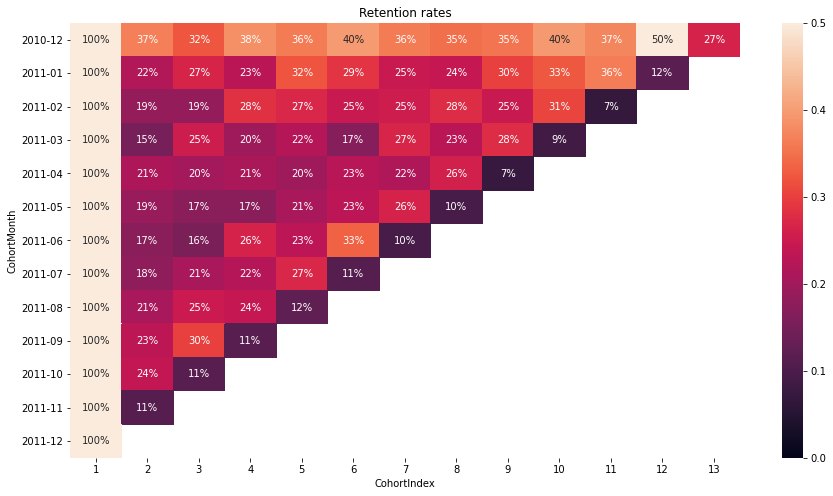

In [36]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5)
plt.show()

### 4. Recency, Frequency and Monetary (RFM) Analysis

In [37]:
#New Total Sales Column  
df['TotalSales'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34


In [38]:
# Calculate RFM metrics
rfm = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (x.max() - x.min()).days,
                                      'InvoiceNo':'count','TotalSales': 'sum'})
#Function Lambdea: it gives the number of days between hypothetical today and the last transaction
rfm

,InvoiceDate,InvoiceNo,TotalSales
CustomerID,,,
12346.0,0,1,77183.60
12347.0,365,182,4310.00
12348.0,282,31,1797.24
12349.0,0,73,1757.55
12350.0,0,17,334.40
...,...,...,...
18280.0,0,10,180.60
18281.0,0,7,80.82
18282.0,118,12,178.05


In [39]:
#Rename columns
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSales':'MonetaryValue'},inplace= True)

#Final RFM values
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,0,1,77183.60
12347.0,365,182,4310.00
12348.0,282,31,1797.24
12349.0,0,73,1757.55
12350.0,0,17,334.40


#### We will rate "Recency" customer who have been active more recently better than the less recent customer, because each company wants its customers to be recent

#### We will rate "Frequency" and "Monetary Value" higher label because we want Customer to spend more money and visit more often(that is different order than recency)

In [40]:
#Building RFM segments
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)

rfm['r_percentile'] = rfm['Recency'].rank(method='first',pct=True,ascending=True)
rfm['f_percentile'] = rfm['Frequency'].rank(method='first',pct=True,ascending=True)
rfm['m_percentile'] = rfm['MonetaryValue'].rank(method='first', pct=True,ascending=True)

r_quartiles = pd.qcut(rfm['r_percentile'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['f_percentile'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['m_percentile'],q=4,labels = m_labels)
rfm = rfm.assign(r_score=r_quartiles, f_score=f_quartiles, m_score=m_quartiles)

In [41]:
rfm['rfm_score'] = rfm.loc[:,['r_score','f_score','m_score']].sum(axis = 1)

In [42]:
rfm

,Recency,Frequency,MonetaryValue,r_percentile,f_percentile,m_percentile,r_score,f_score,m_score,rfm_score
CustomerID,,,,,,,,,,
12346.0,0,1,77183.60,0.000231,0.000231,0.997925,4,1,4,9.0
12347.0,365,182,4310.00,0.979714,0.882204,0.923006,1,4,4,9.0
12348.0,282,31,1797.24,0.807976,0.417473,0.768787,1,2,4,7.0
12349.0,0,73,1757.55,0.000461,0.669202,0.763485,4,3,4,11.0
12350.0,0,17,334.40,0.000692,0.242969,0.286307,4,1,2,7.0
...,...,...,...,...,...,...,...,...,...,...
18280.0,0,10,180.60,0.358230,0.152144,0.131627,3,1,1,5.0
18281.0,0,7,80.82,0.358460,0.101199,0.023974,3,1,1,5.0
18282.0,118,12,178.05,0.536653,0.184647,0.127017,2,1,1,4.0


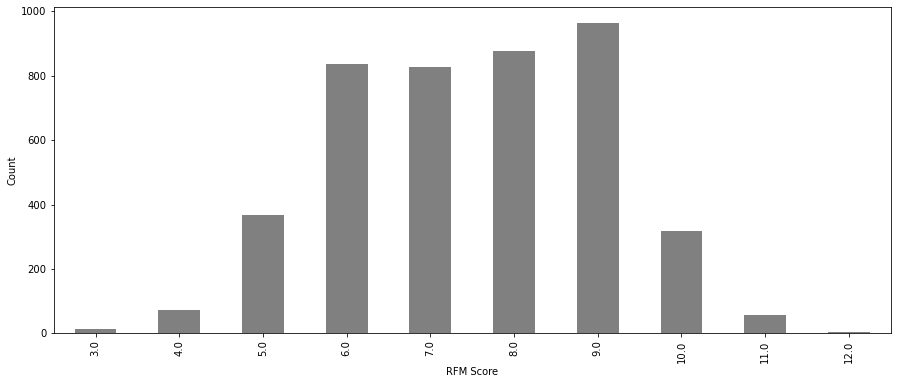

In [43]:
ax = rfm['rfm_score'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6), color = 'grey')
ax.set_xlabel("RFM Score")
ax.set_ylabel("Count")
plt.show()

In [44]:
rfm['Segment'] = 'Low-Value'
rfm.loc[rfm['rfm_score']>5,'Segment'] = 'Mid-Value' 
rfm.loc[rfm['rfm_score']>8,'Segment'] = 'High-Value'
rfm

,Recency,Frequency,MonetaryValue,r_percentile,f_percentile,m_percentile,r_score,f_score,m_score,rfm_score,Segment
CustomerID,,,,,,,,,,,
12346.0,0,1,77183.60,0.000231,0.000231,0.997925,4,1,4,9.0,High-Value
12347.0,365,182,4310.00,0.979714,0.882204,0.923006,1,4,4,9.0,High-Value
12348.0,282,31,1797.24,0.807976,0.417473,0.768787,1,2,4,7.0,Mid-Value
12349.0,0,73,1757.55,0.000461,0.669202,0.763485,4,3,4,11.0,High-Value
12350.0,0,17,334.40,0.000692,0.242969,0.286307,4,1,2,7.0,Mid-Value
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,10,180.60,0.358230,0.152144,0.131627,3,1,1,5.0,Low-Value
18281.0,0,7,80.82,0.358460,0.101199,0.023974,3,1,1,5.0,Low-Value
18282.0,118,12,178.05,0.536653,0.184647,0.127017,2,1,1,4.0,Low-Value


#### We can start taking actions with this segmentation. The main strategies are:
- High Value: Improve Retention
- Mid Value: Improve Retention + Increase Frequency
- Low Value: Increase Frequency

### 5. Revenue and Growth Rate Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392692 non-null  object        
 1   StockCode     392692 non-null  object        
 2   Description   392692 non-null  object        
 3   Quantity      392692 non-null  int64         
 4   InvoiceDate   392692 non-null  datetime64[ns]
 5   UnitPrice     392692 non-null  float64       
 6   CustomerID    392692 non-null  float64       
 7   Country       392692 non-null  object        
 8   InvoiceMonth  392692 non-null  period[M]     
 9   CohortMonth   392692 non-null  period[M]     
 10  CohortIndex   392692 non-null  int64         
 11  TotalSales    392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4), period[M](2)
memory usage: 38.9+ MB


In [46]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34


In [47]:
df_revenue = df.groupby(['InvoiceMonth'])['TotalSales'].sum().reset_index()

In [48]:
df_revenue

,InvoiceMonth,TotalSales
0,2010-12,570422.730
1,2011-01,568101.310
2,2011-02,446084.920
3,2011-03,594081.760
4,2011-04,468374.331
5,2011-05,677355.150
6,2011-06,660046.050
7,2011-07,598962.901
8,2011-08,644051.040
9,2011-09,950690.202


In [49]:
import datetime
df_revenue['InvoiceMonth'] = df_revenue['InvoiceMonth'].dt.strftime('%Y-%m')

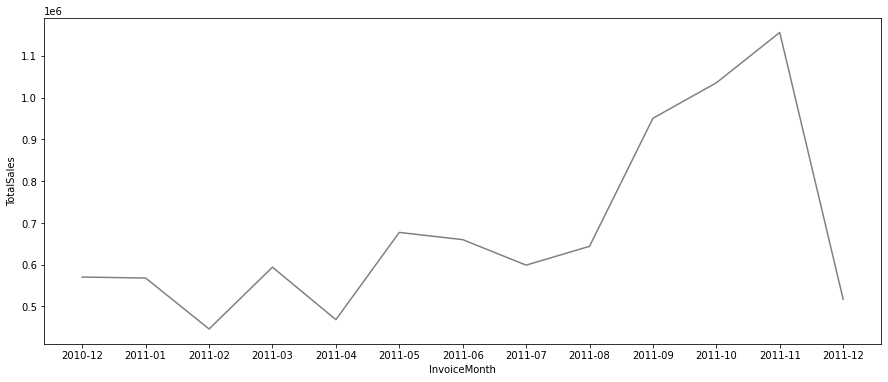

In [50]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x="InvoiceMonth", y="TotalSales", data=df_revenue, color = 'grey')

#### This clearly shows our revenue is growing especially Aug 2011 onwards (and our data in December is incomplete). Absolute numbers are fine, let’s figure out what is our Monthly Revenue Growth Rate:

In [51]:
#using pct_change() function to see monthly percentage change
df_revenue['MonthlyGrowth'] = df_revenue['TotalSales'].pct_change()

In [52]:
df_revenue

,InvoiceMonth,TotalSales,MonthlyGrowth
0,2010-12,570422.730,NaN
1,2011-01,568101.310,-0.004070
2,2011-02,446084.920,-0.214779
3,2011-03,594081.760,0.331768
4,2011-04,468374.331,-0.211600
5,2011-05,677355.150,0.446183
6,2011-06,660046.050,-0.025554
7,2011-07,598962.901,-0.092544
8,2011-08,644051.040,0.075277
9,2011-09,950690.202,0.476110


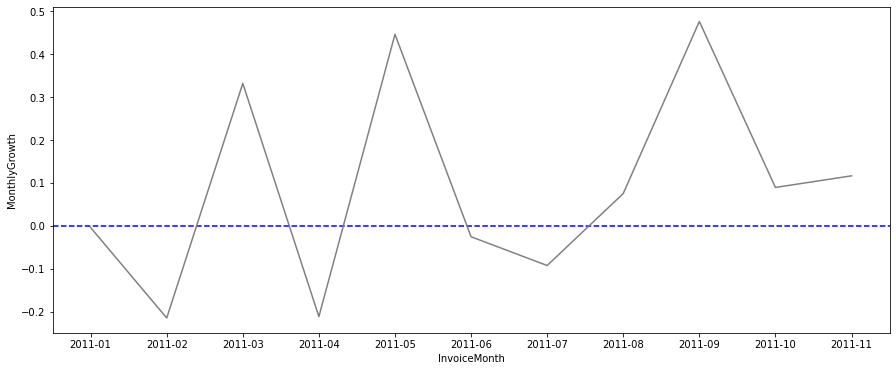

In [53]:
plt.figure(figsize=(15, 6))
plt.axhline(y=0, color='b', linestyle='--')
ax = sns.lineplot(x="InvoiceMonth", y="MonthlyGrowth", data=df_revenue.drop(df_revenue.index[12]), color = 'grey')

### 6. Monthly Active Customers

In [54]:
df['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

#### Starting from this part, we will be focusing on UK data only (which has the most records). We can get the monthly active customers by counting unique CustomerIDs.

In [55]:
df_uk = df.loc[df['Country'] == 'United Kingdom'].reset_index()
df_uk

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSales
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,1,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,1,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349198,541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011-12,2011-05,8,23.40
349199,541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011-12,2010-12,13,23.60
349200,541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011-12,2010-12,13,30.00
349201,541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011-12,2010-12,13,214.80


In [56]:
df_uk_active = df.groupby(['InvoiceMonth'])['CustomerID'].nunique().reset_index()
df_uk_active

,InvoiceMonth,CustomerID
0,2010-12,885
1,2011-01,741
2,2011-02,758
3,2011-03,974
4,2011-04,856
5,2011-05,1056
6,2011-06,991
7,2011-07,949
8,2011-08,935
9,2011-09,1266


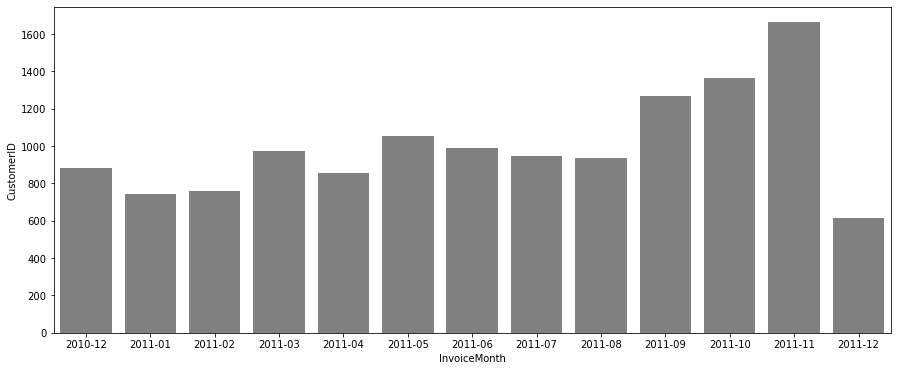

In [57]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="InvoiceMonth", y="CustomerID", data=df_uk_active, color = 'grey')

#### In April 2011, Monthly Active Customer number dropped to 856 from 974 (-12.1%).

### 7. Monthly Order Count

In [58]:
#create a new dataframe for no. of order by using quantity field
df_monthly_sales = df_uk.groupby('InvoiceMonth')['Quantity'].sum().reset_index()
df_monthly_sales

,InvoiceMonth,Quantity
0,2010-12,266573
1,2011-01,277650
2,2011-02,212792
3,2011-03,275385
4,2011-04,259592
5,2011-05,301113
6,2011-06,280321
7,2011-07,301552
8,2011-08,310101
9,2011-09,453420


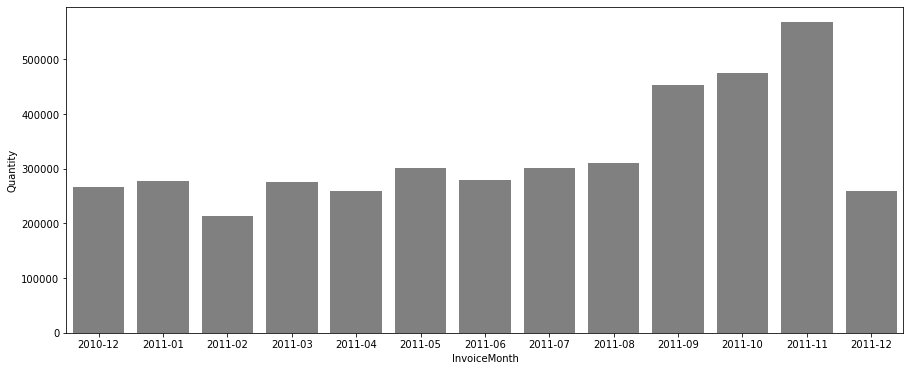

In [59]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="InvoiceMonth", y="Quantity", data=df_monthly_sales, color = 'grey')

#### As we expected, Order Count is also declined in April 2011 (275k to 260k, -5%)

### 8. New Customer Ratio
#### In our dataset, we can assume a new customer is whoever did his/her first purchase in the time window we defined. We will do it monthly for this example. We will be using .min() function to find our first purchase date for each customer and define new customers based on that.

In [60]:
#create a dataframe contaning CustomerID and first purchase date
df_min_purchase = df_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
df_min_purchase.columns = ['CustomerID','MinPurchaseDate']
df_min_purchase

,CustomerID,MinPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2010-12-05 15:38:00
2,12748.0,2010-12-01 12:48:00
3,12749.0,2011-05-10 15:25:00
4,12820.0,2011-01-17 12:34:00
...,...,...
3915,18280.0,2011-03-07 09:52:00
3916,18281.0,2011-06-12 10:53:00
3917,18282.0,2011-08-05 13:35:00
3918,18283.0,2011-01-06 14:14:00


In [61]:
df_min_purchase['MinPurchaseYearMonth'] = pd.to_datetime(df_min_purchase['MinPurchaseDate']).dt.to_period('M')
df_min_purchase

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,2011-01
1,12747.0,2010-12-05 15:38:00,2010-12
2,12748.0,2010-12-01 12:48:00,2010-12
3,12749.0,2011-05-10 15:25:00,2011-05
4,12820.0,2011-01-17 12:34:00,2011-01
...,...,...,...
3915,18280.0,2011-03-07 09:52:00,2011-03
3916,18281.0,2011-06-12 10:53:00,2011-06
3917,18282.0,2011-08-05 13:35:00,2011-08
3918,18283.0,2011-01-06 14:14:00,2011-01


In [62]:
#merge first purchase date column to our main dataframe (df_uk)
df_uk = pd.merge(df_uk, df_min_purchase, on='CustomerID')
df_uk.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSales,MinPurchaseDate,MinPurchaseYearMonth
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,1,15.30,2010-12-01 08:26:00,2010-12
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34,2010-12-01 08:26:00,2010-12
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,1,22.00,2010-12-01 08:26:00,2010-12
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34,2010-12-01 08:26:00,2010-12
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34,2010-12-01 08:26:00,2010-12


In [63]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
df_uk['UserType'] = 'New'
df_uk.loc[df_uk['InvoiceMonth']>df_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'
df_uk.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSales,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,1,15.30,2010-12-01 08:26:00,2010-12,New
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34,2010-12-01 08:26:00,2010-12,New
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,1,22.00,2010-12-01 08:26:00,2010-12,New
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34,2010-12-01 08:26:00,2010-12,New
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1,20.34,2010-12-01 08:26:00,2010-12,New


In [64]:
#calculate the Revenue per month for each user type
df_user_type_revenue = df_uk.groupby(['InvoiceMonth','UserType'])['TotalSales'].sum().reset_index()
df_user_type_revenue

,InvoiceMonth,UserType,TotalSales
0,2010-12,New,496477.340
1,2011-01,Existing,199116.690
2,2011-01,New,241759.640
3,2011-02,Existing,219000.380
4,2011-02,New,135617.820
5,2011-03,Existing,295924.110
6,2011-03,New,169860.080
7,2011-04,Existing,298686.160
8,2011-04,New,110046.951
9,2011-05,Existing,455665.250


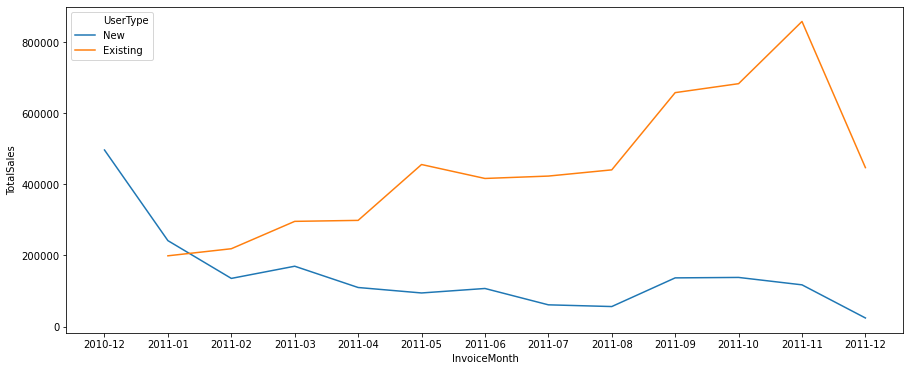

In [65]:
df_user_type_revenue['InvoiceMonth'] = df_user_type_revenue['InvoiceMonth'].dt.strftime('%Y-%m')
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x="InvoiceMonth", y="TotalSales", hue="UserType", data=df_user_type_revenue, color = 'grey')

#### Existing customers are showing a positive trend and tell us that our customer base is growing but new customers have a slight negative trend.

In [66]:
# Let’s have a better view by looking at the New Customer Ratio:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
df_user_ratio = df_uk.loc[df_uk['UserType'] == 'New'].groupby(['InvoiceMonth'])['CustomerID'].nunique()/df_uk.loc[df_uk['UserType'] == 'Existing'].groupby(['InvoiceMonth'])['CustomerID'].nunique() 
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio = df_user_ratio.dropna()
df_user_ratio

,InvoiceMonth,CustomerID
1,2011-01,1.238754
2,2011-02,1.002950
3,2011-03,0.908894
4,2011-04,0.546351
5,2011-05,0.362606
6,2011-06,0.317037
7,2011-07,0.244928
8,2011-08,0.203463
9,2011-09,0.317241
10,2011-10,0.357616


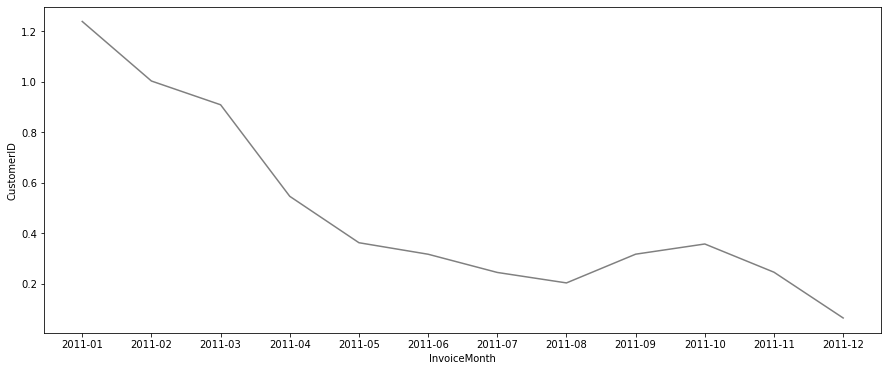

In [67]:
df_user_ratio['InvoiceMonth'] = df_user_ratio['InvoiceMonth'].dt.strftime('%Y-%m')
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x="InvoiceMonth", y="CustomerID", data=df_user_ratio, color = 'grey')

#### New Customer Ratio has declined as expected and running around 20%.